In [1]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-01-17 07:47:50--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: 'Compiled_Reviews.txt.14'

     0K .......... .......... .......... .......... ..........  0% 3.37M 6s
    50K .......... .......... .......... .......... ..........  0% 4.50M 5s
   100K .......... .......... .......... .......... ..........  0% 19.4M 4s
   150K .......... .......... .......... .......... ..........  0% 8.09M 4s
   200K .......... .......... .......... .......... ..........  1% 7.52M 3s
   250K .......... .......... .......... .......... ..........  1% 12.2M 3s
   300K .......... .......... .......... .......... ..........  1%

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create lists
reviews=[]
labels=[]

with open("Compiled_Reviews.txt", encoding= "utf-8") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        reviews.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])



In [5]:
from collections import Counter
import re
# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [re.findall("[^ ]+",txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the first 5000 words in the list
type_list=so[0:5000]

In [6]:
token_def = re.compile("[^ ]+")

In [7]:
# Create a 36547 x 5000 matrix of zeros
M = np.zeros((len(reviews), len(type_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = token_def.findall(rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1



In [8]:
#Split the dataset into training and testing set
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))

In [9]:
M_train = M[train_ints,]
M_test = M[test_ints,]
labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]

Text(0, 0.5, 'loss')

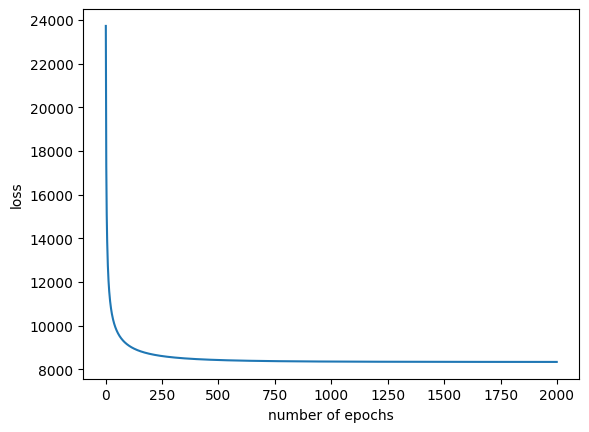

In [11]:
#Logistic Regression Classifier
import math

num_features=5000  # vocab
y=[int(l == "positive") for l in labels_train]  #true label list containing 1 or 0
weights = np.random.rand(num_features) #random 5000 weights
bias=np.random.rand(1) #random
n_iters = 2000 #how many times through the same text
lr=0.01
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters): 
  layer_1_error = 0
  #Stochastic Gradient Descent
  for i in range(len(y)):
        z = M_train[i].dot(weights)+bias
        q = 1/(1+np.exp(-z))
        eps=0.00001   # constant added so that q and 1-q is never zero
        loss = -sum((y[i]*np.log2(q+eps) + (1 - y[i]) * np.log2(1-q + eps)))
        layer_1_error += loss
        y_pred=[int(ql > 0.5) for ql in q]
        #backward pass
        dw = (q-y[i]) * M_train[i]
        db = (q-y[i])
        weights = weights - lr*dw
        bias = bias - lr*db 
  logistic_loss.append(layer_1_error)
plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [12]:
#Using Test Dataset
z = M_test.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_test_pred=[int(ql > 0.5) for ql in q]

In [13]:
#Calculating Accuracy of Test Data
y_test=[int(l == "positive") for l in labels_test]
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
acc = sum(acc_test)/len(acc_test)
print("Accuracy: " + str(acc))


Accuracy: 0.8227086183310534


In [14]:
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]

In [15]:
#Assigning TP, FP, TN, FN for test data
true_positives=sum([int(yp == "positive" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
false_positives=sum([int(yp == "positive" and labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
false_negative=sum([int(yp == "negative" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
true_negative=sum([int(yp == "negative" and labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])

In [16]:
#Calculate Precision, Recall, F1 for test data
pres = true_positives/(true_positives + false_positives)
recall = true_positives/(true_positives + false_negative)
f1 = (2* pres * recall) / (pres + recall)

print("Precision: "+str(pres))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Precision: 0.8462461021827776
Recall: 0.8434138178340904
F1: 0.8448275862068966


In [17]:
#Calculate Precision and recall for training data
z = M_train.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_train_pred=[int(ql > 0.5) for ql in q]
labels_train_pred=["positive" if s == 1 else "negative" for s in y_train_pred]

true_positives=sum([int(yp == "positive" and labels_train[s] == "positive") for s,yp in enumerate(labels_train_pred)])
false_positives=sum([int(yp == "positive" and labels_train[s] == "negative") for s,yp in enumerate(labels_train_pred)])
false_negatives=sum([int(yp == "negative" and labels_train[s] == "positive") for s,yp in enumerate(labels_train_pred)])
precision=true_positives/(true_positives+false_positives)
recall=true_positives/(true_positives+false_negatives)
print(precision)
print(recall)


0.9398736081853747
0.93013282506403


In [18]:
#Extract top 20 words from each sentiment
[type_list[x] for x in np.argsort(weights)[0:10]]

['terrible.',
 'disappointment.',
 'terrible,',
 'hype',
 'defect',
 'worthless',
 'boring,',
 'OS',
 'blurry',
 'Upon',
 'garbage.',
 'instead"',
 'poor.',
 'Unfortunately',
 'ruined',
 'sling',
 'monsters',
 'conservative',
 'worst',
 'useless.']

In [19]:
[type_list[x] for x in np.argsort(weights)[::-1][0:20]]

['refreshing',
 'Excellent',
 'Highly',
 'favorites',
 'classical',
 'protects',
 'nights',
 'find.',
 'GTA',
 'great!',
 'delicious',
 'expert',
 'figures',
 'remind',
 'Season',
 'flavor,',
 'too"',
 '(this',
 'weapon',
 'site,']